# 01. Map polynya events with University Bremen ASI Sea Ice Concentrations

Data source:
https://seaice.uni-bremen.de/sea-ice-concentration/amsre-amsr2/

## Import packages

In [1]:
# general
import numpy as np, numpy.ma as ma
import xarray as xr
import pandas as pd

# time
from datetime import datetime, timedelta

# local system 
import sys  
import glob
import os

# plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.colors
import cmocean

# geo plotting
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeat

# for use in suppressing repeated warnings when mapping w/ shapely
import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

# path to own functions
sys.path.append('../Libraries_functions/')
from LIB_ASI_SIC_UniB import grab_ASI_SIC, grab_projinfo_SIC
from LIB_geo_func import *
from LIB_geo_plot import *

%load_ext autoreload
%autoreload 2
# potentially uninstall pyhdf?

## Make map

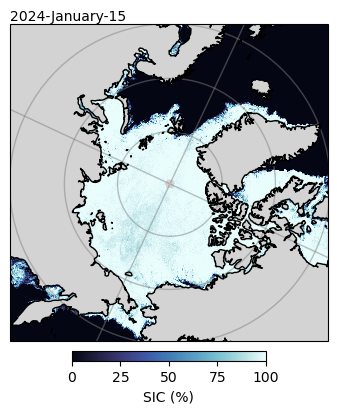

In [5]:

# specify date to plot
#============================
date = datetime(2024, 1, 15)
#============================

# read daily sic data from computer files into dictionary
data = grab_ASI_SIC(date=date, 
                   main_path='/Volumes/Seagate2/asi-nc/files/', 
                   coord_file='LongitudeLatitudeGrid-n6250-Arctic.hdf', 
                   hemisphere='n', resolution='6250', version='v5.4', 
                   return_vars=['xx', 'yy', 'lon', 'lat', 'sic', 'proj', 'ds'], 
                   include_units=False, annual_folders=False, return_dict = True, quiet=True)

# create figure
#--------------
# create map figure in north polar stereographic projection
map_projection = ccrs.NorthPolarStereo(central_longitude=205)
fig, ax = plt.subplots(figsize=(5,5), subplot_kw=dict(projection=map_projection))

# background color
ax.patch.set_facecolor('lightgray')

# set map extent [lon1, lon2, lat1, lat2]
ax.set_extent([0, 359, 60, 90], crs=ccrs.PlateCarree())  

# add coastlines
ax.coastlines(zorder=100)

# lat / lon lines
add_grid(ax, lats=np.arange(60,90,10), lons=np.arange(0,360,90), linewidth=1, color='gray', alpha=0.5, zorder=4)


# plot 2d sic data 
icec = ax.pcolormesh(data['xx'], data['yy'], data['sic'], 
                     cmap = cmocean.cm.ice, vmin=0, vmax=100, transform=data['proj'])

plt.colorbar(icec, label='SIC (%)', orientation='horizontal', shrink = 0.5, pad=0.025)


# label date
ax.text(0, 1, date.strftime('%Y-%B-%d'), ha='left', va='bottom', transform=ax.transAxes, clip_on=False)

plt.show()


# save figure, if desired
save_path = f'/Users/jewell/Desktop/map_{date.strftime("%Y-%m-%d")}.png'
fig.savefig(save_path, dpi=300, bbox_inches = 'tight')